<a href="https://colab.research.google.com/github/QuangDuyxyz/Machine-Learning/blob/main/Emotion_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Tạo thư mục .kaggle:
!mkdir -p ~/.kaggle

In [ ]:
!cp "/content/kaggle.json" ~/.kaggle/

In [ ]:
# Thiết lập quyền cho file kaggle.json:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Copy the kaggle api json path
!cp "/content/kaggle.json" ~/.kaggle/kaggle.json

In [ ]:
#install the kaggle python package using pip
!python -m pip install -qq kaggle

In [ ]:
# Download the dataset from kaggle
!kaggle datasets download -d ameyamote030/einterface-image-dataset

 98% 784M/801M [00:08<00:00, 109MB/s] 
100% 801M/801M [00:08<00:00, 99.4MB/s]


In [ ]:
# unzip the datasets file
!unzip -qq "/content/einterface-image-dataset.zip"

In [ ]:
!pip install tensorflow

In [ ]:
import os
import glob as gb
import pandas as pd
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:
TRAIN_DIR = "/content/eINTERFACE_2021_Image/train"
TEST_DIR = "/content/eINTERFACE_2021_Image/test"
BATCH_SIZE = 64

In [ ]:
for folder in os.listdir(TRAIN_DIR):
    files = gb.glob(pathname= str(TRAIN_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 1891 in folder Disgust
For training data, found 1922 in folder Surprise
For training data, found 1922 in folder Fear
For training data, found 1922 in folder Happiness
For training data, found 1896 in folder Anger
For training data, found 1922 in folder Sadness


In [ ]:
for folder in os.listdir(TEST_DIR):
    files = gb.glob(pathname= str(TEST_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For testing data, found {len(files)} in folder {folder}')

For testing data, found 237 in folder Disgust
For testing data, found 241 in folder Surprise
For testing data, found 241 in folder Fear
For testing data, found 241 in folder Happiness
For testing data, found 237 in folder Anger
For testing data, found 241 in folder Sadness


# See some random images with labels

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    # We will view images from here
    target_folder = target_dir + target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # read in the image and plot it using matplolib
    img = mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape {img.shape}")

    return img

In [ ]:
class_names = ['Anger','Disgust','Fear','Happiness','Sadness','Surprise']

Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)


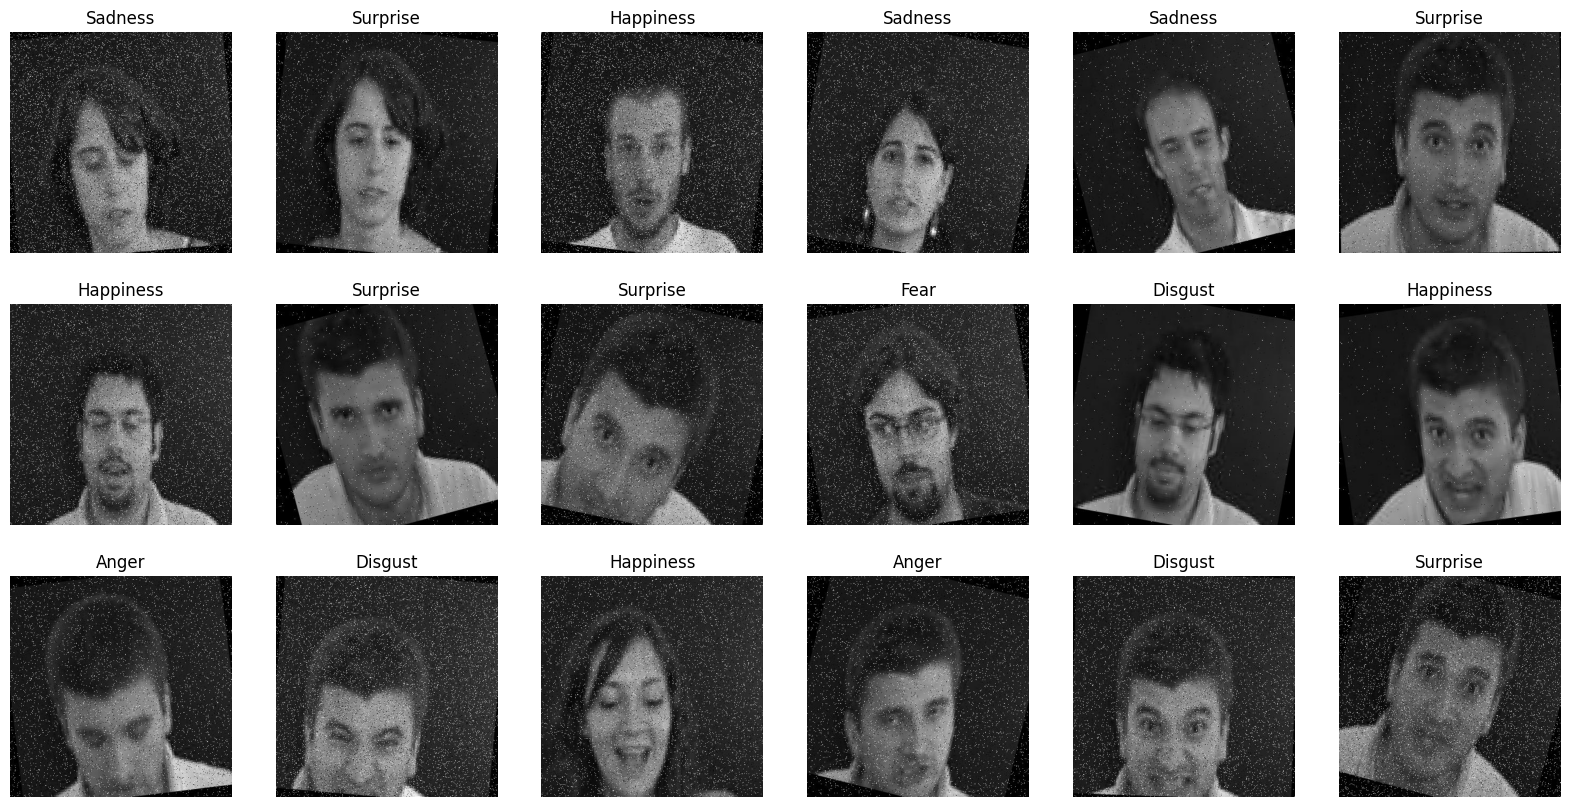

In [ ]:
plt.figure(figsize=(20,10))
for i in range(18):
    plt.subplot(3, 6, i+1)
    class_name = random.choice(class_names)
    img = view_random_image(target_dir="/content/eINTERFACE_2021_Image/train/", target_class=class_name)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(TRAIN_DIR,
                                                 target_size = (128, 128),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(TEST_DIR,
                                            target_size = (128, 128),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical')

Found 11475 images belonging to 6 classes.
Found 1438 images belonging to 6 classes.


# The CNN classifier model building

In [ ]:
from keras.layers import Dropout

# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(16, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.5)) # Thêm dropout để giảm overfitting
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units=256, activation='relu'))
classifier.add(Dropout(0.5)) # Thêm dropout

classifier.add(Dense(units = 6, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20, # Thêm xoay ảnh
    width_shift_range=0.2, # Thêm dịch chuyển ngang
    height_shift_range=0.2 # Thêm dịch chuyển dọc
)


In [ ]:
## model summary
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 63, 63, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 64)       

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# Cài đặt callbacks
callbacks = [
    EarlyStopping(
        monitor="val_loss",
        min_delta=1e-2,
        patience=10,
        verbose=1,
        restore_best_weights=True  # Khôi phục trọng số tốt nhất khi dừng sớm
    ),
    ModelCheckpoint(  # Lưu mô hình tốt nhất
        filepath='best1_model.h5',
        monitor='val_loss',
        save_best_only=True
    )
]

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Trong hàm fit
history = classifier.fit(
    training_set,
    validation_data=test_set,
    epochs=50,
    callbacks=[early_stopping]
)


Epoch 1/50
180/180 [==============================] - 83s 447ms/step - loss: 1.7791 - accuracy: 0.1942 - val_loss: 1.6354 - val_accuracy: 0.3102
Epoch 2/50
180/180 [==============================] - 76s 424ms/step - loss: 1.5275 - accuracy: 0.3687 - val_loss: 1.2827 - val_accuracy: 0.4624
Epoch 3/50
180/180 [==============================] - 75s 417ms/step - loss: 1.2933 - accuracy: 0.4726 - val_loss: 1.1654 - val_accuracy: 0.5376
Epoch 4/50
180/180 [==============================] - 75s 418ms/step - loss: 1.1354 - accuracy: 0.5367 - val_loss: 0.9218 - val_accuracy: 0.6154
Epoch 5/50
180/180 [==============================] - 76s 420ms/step - loss: 0.9996 - accuracy: 0.6019 - val_loss: 0.7924 - val_accuracy: 0.6683
Epoch 6/50
180/180 [==============================] - 76s 425ms/step - loss: 0.9337 - accuracy: 0.6329 - val_loss: 0.8468 - val_accuracy: 0.6530
Epoch 7/50
180/180 [==============================] - 75s 419ms/step - loss: 0.8526 - accuracy: 0.6686 - val_loss: 0.6695 - val_ac

In [ ]:
from keras.metrics import Precision, Recall

# Trong hàm compile của mô hình
classifier.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(), Recall()]
)


In [ ]:
classifier.evaluate(test_set)

23/23 [==============================] - 4s 111ms/step - loss: 0.3247 - accuracy: 0.8839 - precision: 0.9046 - recall: 0.8567


[0.3247370719909668,
 0.8838664889335632,
 0.9045521020889282,
 0.8567454814910889]

In [ ]:
# Lưu mô hình sau khi huấn luyện
classifier.save('/content/drive/MyDrive/Face_Recognition/model/Emotion_model1.h5')

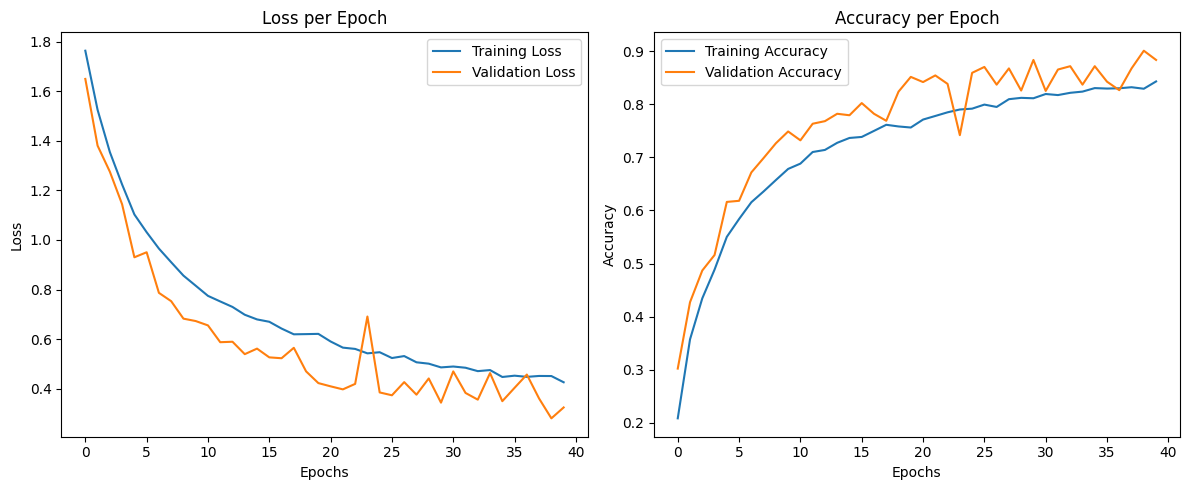

In [ ]:
# Tạo DataFrame từ lịch sử huấn luyện
history_df = pd.DataFrame(history.history)

# Tạo subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Vẽ biểu đồ Loss
history_df[['loss', 'val_loss']].plot(ax=axes[0])
axes[0].set_title('Loss per Epoch')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend(['Training Loss', 'Validation Loss'])

# Vẽ biểu đồ Accuracy
history_df[['accuracy', 'val_accuracy']].plot(ax=axes[1])
axes[1].set_title('Accuracy per Epoch')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend(['Training Accuracy', 'Validation Accuracy'])

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

In [ ]:
model_path = "/content/drive/MyDrive/Face_Recognition/model/Emotion_model1.h5"
loaded_model = keras.models.load_model(model_path)

import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

image = cv2.imread("/content/eINTERFACE_2021_Image/test/Surprise/myvideo_frames1690_jpg.rf.6ca8cff1f3a8a2704447c7132c133c76.jpg")
image_fromarray = Image.fromarray(image, 'RGB')
resize_image = image_fromarray.resize((128, 128))
expand_input = np.expand_dims(resize_image,axis=0)
input_data = np.array(expand_input)
input_data = input_data/255

pred = loaded_model.predict(input_data)
result = pred.argmax()
result

NameError: ignored

In [ ]:
training_set.class_indices

{'Anger': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happiness': 3,
 'Sadness': 4,
 'Surprise': 5}